In [1]:
pip install face_recognition
from time import time
import dlib
import face_recognition
import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: ignored

In [0]:
img_path = "/content/image_00001.png"
# dlib_img = face_recognition.load_image_file(img_path)
# hogsvm_locations = face_recognition.face_locations(dlib_img) #hog+svm
# cnn_locations = face_recognition.face_locations(dlib_img, model="cnn") #CNN

In [0]:
def compare_face_recognition(img_name):
    #read image by opencv
    img = cv2.imread(img_name) 
    img_result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #結果出力用

    # #opencv haarcascade
    # img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # グレースケール化
    # cascade_path = "./haarcascades/haarcascade_frontalface_alt.xml"
    # cascade = cv2.CascadeClassifier(cascade_path) # detectorを作成
    # cascade_locations = cascade.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=1) # 顔認識とパラメーター

    # rect_color = (0, 255, 0)
    # if len(cascade_locations) > 0:
    #     for x, y, width, height in cascade_locations:
    #         cv2.rectangle(img_result, (x, y), (x + width, y + height), rect_color, thickness=2)

    # Dlib
    dlib_img = face_recognition.load_image_file(img_name)
    # Dlib hog+svm
    hogsvm_locations = face_recognition.face_locations(dlib_img) #hog+svmモデルで顔認識
    
    rect_color = (0, 0, 255)
    if len(hogsvm_locations) > 0:
        for top, left, bottom, right in hogsvm_locations:
            cv2.rectangle(img_result, (left, top), (right, bottom), rect_color, thickness=2)

    # Dlib CNN        
    cnn_locations = face_recognition.face_locations(dlib_img, model="cnn") #CNNモデルで顔認識
    
    rect_color = (255, 0, 0)
    if len(cnn_locations) > 0:
        for top, left, bottom, right in cnn_locations:
            cv2.rectangle(img_result, (left, top), (right, bottom), rect_color, thickness=2)
    
    return img_result

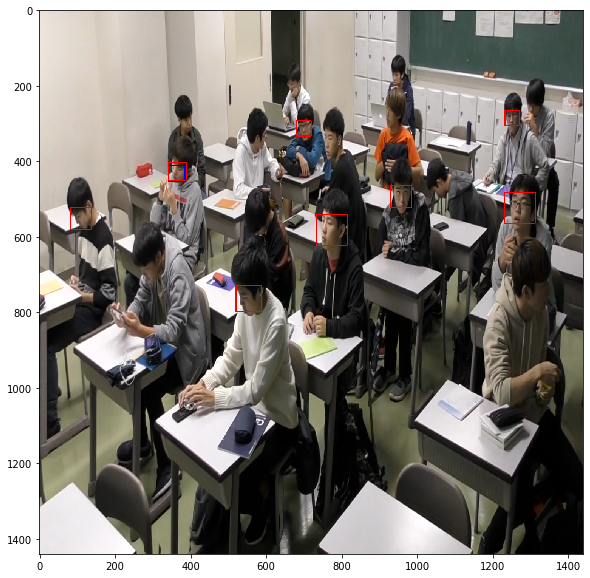

In [0]:
plt.figure(figsize=(30,10))
plt.imshow(compare_face_recognition(img_path))

In [0]:
!bzip2 -d /content/mmod_human_face_detector.dat.bz2

In [0]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# detector = dlib.get_frontal_face_detector()
detector = dlib.cnn_face_detection_model_v1("mmod_human_face_detector.dat")

NameError: ignored

In [0]:
start = time()
dets = detector(img_rgb, 0)
end = time()

print(dets)
print("time :", end - start)

mmod_rectangles[[(734, 530) (829, 625)], [(1233, 482) (1328, 577)], [(516, 724) (595, 803)]]
time : 0.824185848236084


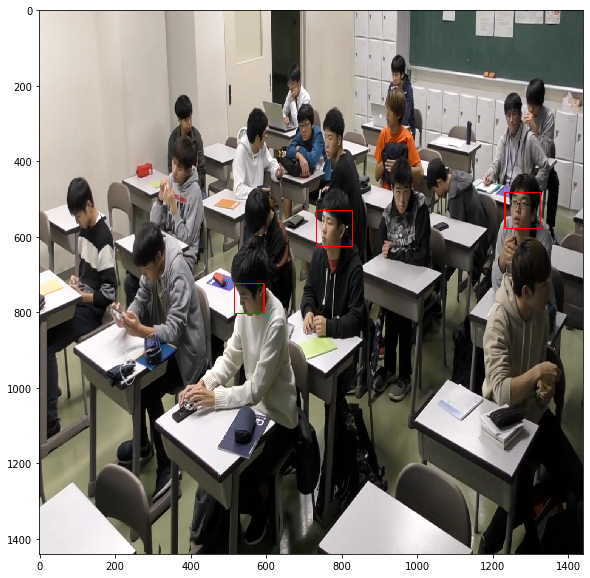

In [0]:
img_copy = img_rgb.copy()
# for rect in dets:
#     cv2.rectangle(img_copy, (rect.left(), rect.top()), (rect.right(), rect.bottom()), (255, 0, 0), 2)
for rect in dets:
    cv2.rectangle(img_copy, (rect.rect.left(), rect.rect.top()), (rect.rect.right(), rect.rect.bottom()), (255, 0, 0), 2)

plt.figure(figsize=(30,10))
plt.imshow(img_copy)